In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

# Test peak fit

## Implemented peak functions

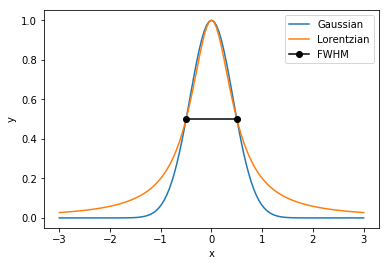

In [2]:
peak_functions = [Gauss(), Lorentzian()]

x = np.linspace(-3, 3, 123)
for f in peak_functions:
    y = f(x, 0, 1, 1)
    plt.plot(x, y, label=f.name);

plt.plot([-.5, .5], [.5, .5], '-ok', label='FWHM'); # test FWHM
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Simple fit

{'x0': 0.490844037501366, 'fwhm': 1.0241032333830498, 'amplitude': 1.0217385587964012}
{'slope': -0.007282438777188574, 'intercept': 6.987011786780077}


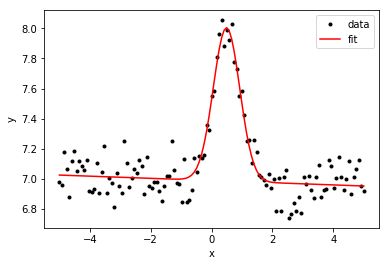

In [3]:
# Generate random data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

# _note:_ a linear slope is by default included
# set background=None to prevent this

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## With a linear background

{'x0': 0.4634189588774658, 'fwhm': 0.9314657758282793, 'amplitude': 1.0810361544459177}
{'slope': 0.09983095582653836, 'intercept': 6.983661629189782}


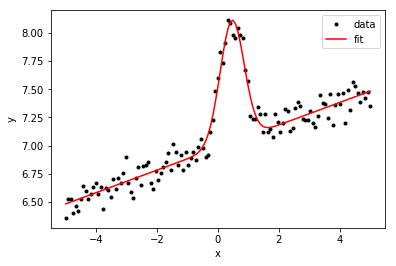

In [4]:
# Generate random data data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

{'x0': 0.5387696850760132, 'fwhm': 1.0576468781455939, 'amplitude': 1.094226937774295}


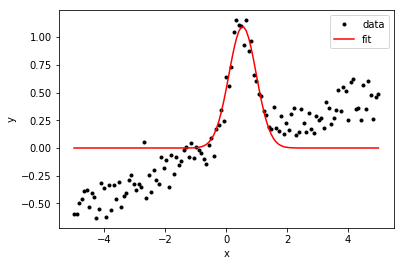

In [5]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Multi-peak

{'x0': -1.4950246634242184, 'fwhm': 1.4626744574894863, 'amplitude': 0.965109975145636}
{'x0': 0.4903103241729745, 'fwhm': 0.9016647860166208, 'amplitude': 0.8627632933166676}
{'slope': -0.004784338051801704, 'intercept': 0.017139768541100525}


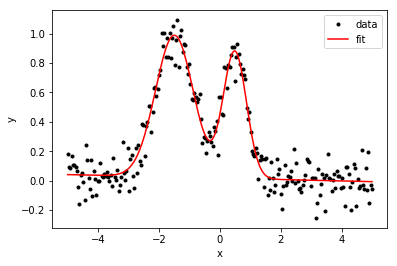

In [6]:
# Generate random data
x = np.linspace(-5, 5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();